**Start of Exercise 1 - Exercise 2 (In progress)**


       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


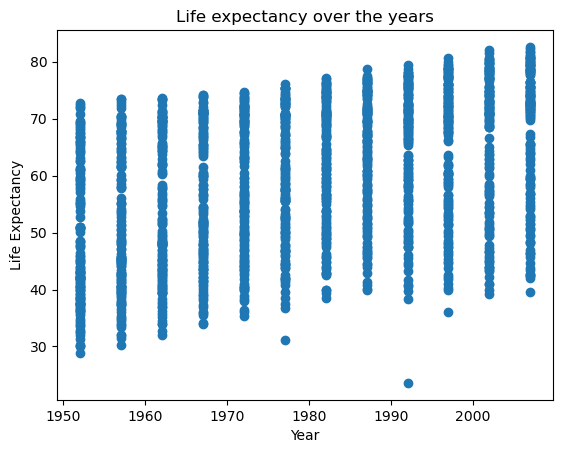

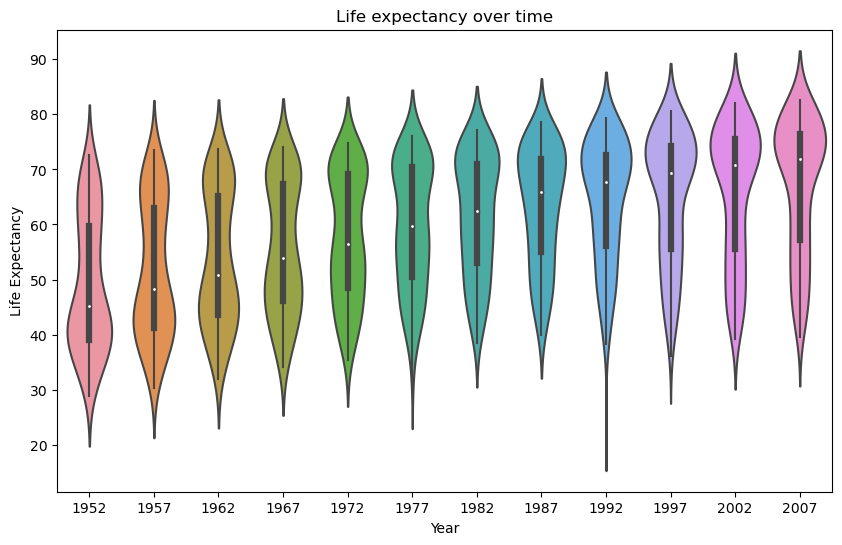

Coefficients: [0.32590383]
Intercept: -585.6521874415448


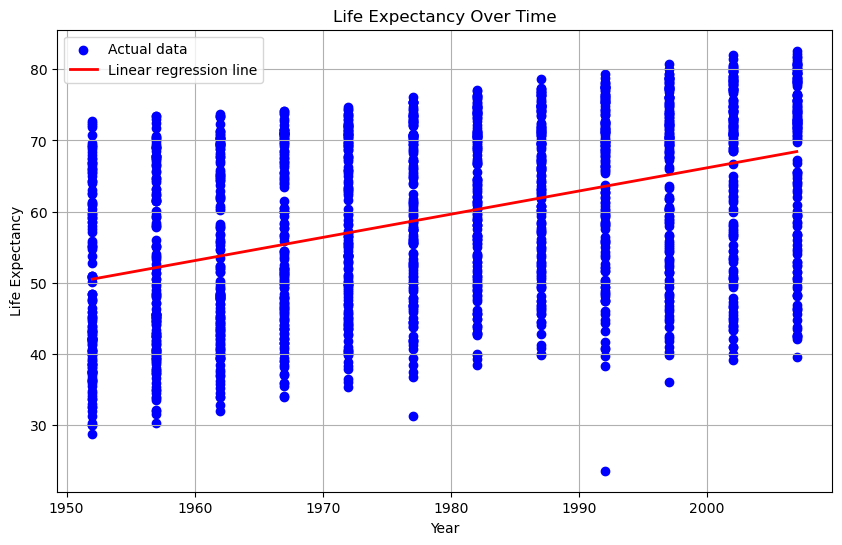

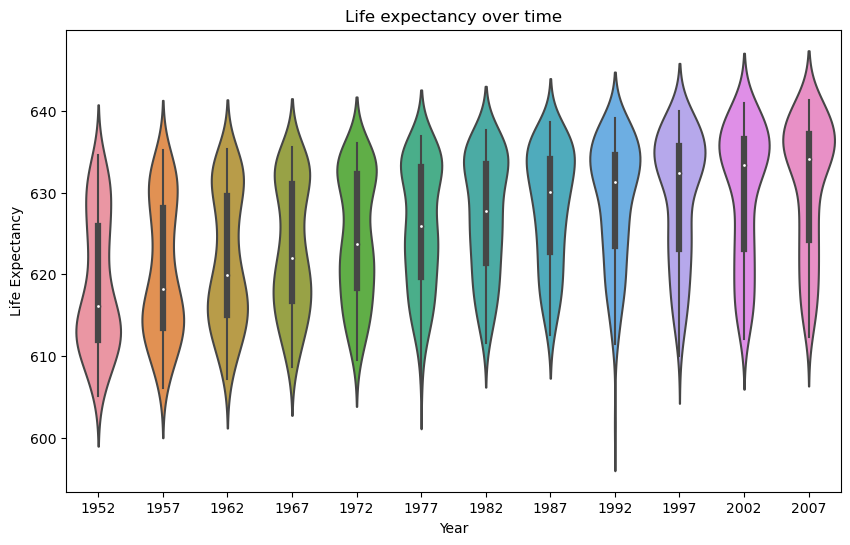

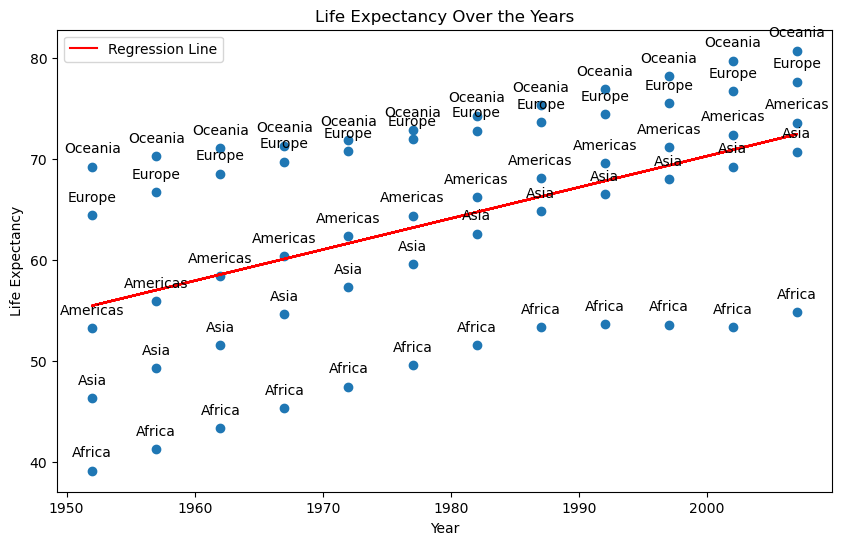

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import statsmodels.formula.api as smf

file_path = 'data.tsv'

# Read the TSV file into a pandas DataFrame
df = pd.read_csv(file_path, sep='\t')
print(df.head())

# Exercise 1
x = df['year']
y = df['lifeExp']

plt.scatter(x, y)
plt.title('Life expectancy over the years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# Question 2
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create the violin plot
sns.violinplot(x='year', y='lifeExp', data=df)

plt.title("Life expectancy over time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()





# Exercise 2
X = df[['year']]  # Input features (years)
y = df['lifeExp'] # Target variable (life expectancy)
# Create a LinearRegression model
model = LinearRegression()
# Fit the model to the data
model.fit(X, y)
# Make predictions
predictions = model.predict(X)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')

# Plot the linear regression line
plt.plot(X, predictions, color='red', linewidth=2, label='Linear regression line')

plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.grid(True)
plt.show()





x = df['year']
y = df['lifeExp'] - ((df['lifeExp'] * model.coef_) + model.intercept_)
# Question 2
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create the violin plot
sns.violinplot(x=x, y=y)

plt.title("Life expectancy over time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

plt.show()




# Group by continent and calculate the mean of life expectancy
grouped_df = df.groupby(['continent', 'year'])['lifeExp'].mean().reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['year'], grouped_df['lifeExp'])

# Fit a linear regression model
model = LinearRegression()
model.fit(grouped_df[['year']], grouped_df['lifeExp'])

# Plot the regression line
plt.plot(grouped_df['year'], model.predict(grouped_df[['year']]), color='red', label='Regression Line')

# Add labels for each point
for i in range(len(grouped_df)):
    plt.annotate(grouped_df['continent'][i], (grouped_df['year'].iloc[i], grouped_df['lifeExp'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

**End of Exercise 1 - Exercise 2 (In progress)**


# Justin's Contribution: E2 to E6


**Exercise 2**: Fit a linear regression model using, e.g., the `LinearRegression` function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable). 

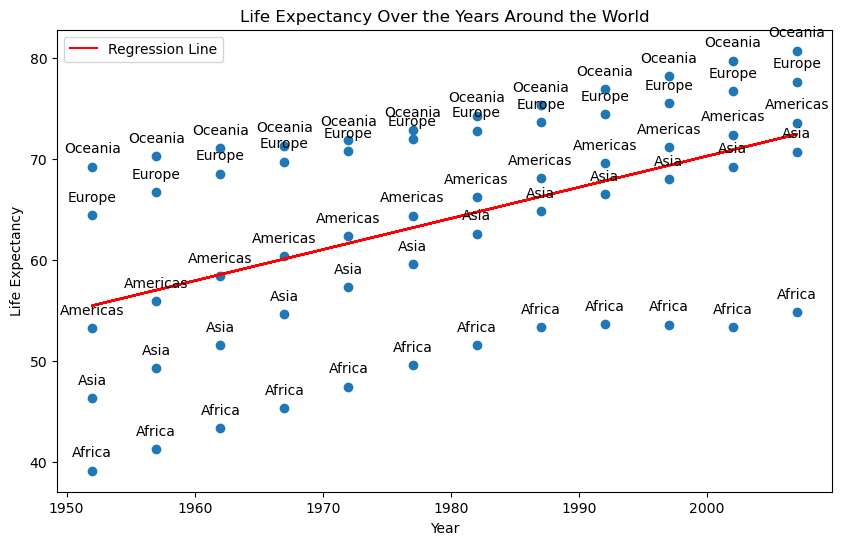

Slope (Year): 0.3085014252302476
Intercept: -546.7147983489472
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     19.08
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           5.24e-05
Time:                        09:45:55   Log-Likelihood:                -218.83
No. Observations:                  60   AIC:                             441.7
Df Residuals:                      58   BIC:                             445.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [6]:
# Group by continent and calculate the mean of life expectancy
grouped_df = df.groupby(['continent', 'year'])['lifeExp'].mean().reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['year'], grouped_df['lifeExp'])

# Fit a linear regression model
model = LinearRegression()
model.fit(grouped_df[['year']], grouped_df['lifeExp'])

# Plot the regression line
plt.plot(grouped_df['year'], model.predict(grouped_df[['year']]), color='red', label='Regression Line')

# Add labels for each point
for i in range(len(grouped_df)):
    plt.annotate(grouped_df['continent'].iloc[i], (grouped_df['year'].iloc[i], grouped_df['lifeExp'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Life Expectancy Over the Years Around the World')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

# Display the slope and intercept
print(f'Slope (Year): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

# To find the p-value and other statistics 
model = smf.ols(formula="lifeExp ~ year", data=grouped_df).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary to see the statistics
print(summary)

**Question 6**: On average, by how much does life expectancy increase every year around the world? To find the p-value and other statistics, you may use statsmodels.formula.api library. In that library there is a function

On average, life expectancy increases by .308501 per year.

**Question 7**: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

The p-value associated with the coefficient for the 'year' variable is less than 0.05. This suggests that there is a statistically significant relationship between the year and life expectancy. In this case, we would reject the null hypothesis of no relationship between year and life expectancy, and conclude that there is evidence to support a linear relationship between the two variables.

**Exercise 3**: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

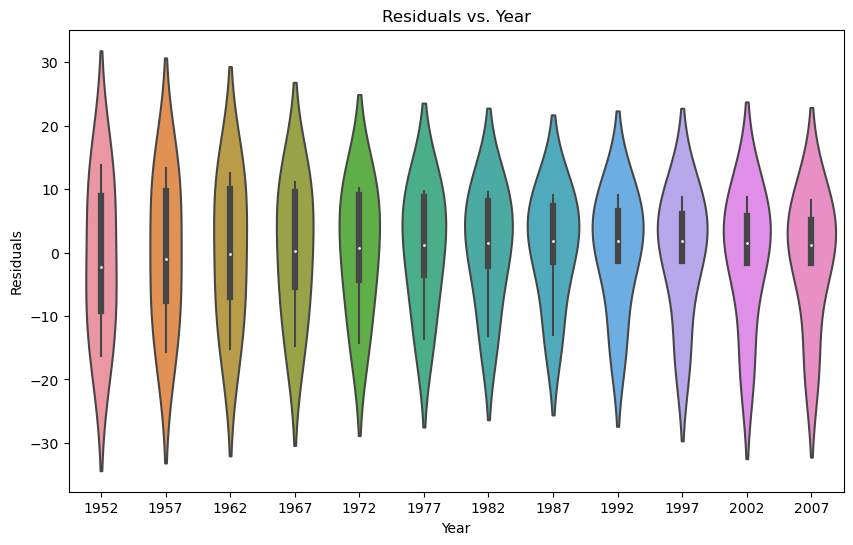

In [7]:
# Calculate residuals
residuals = grouped_df['lifeExp'] - model.predict(grouped_df[['year']])

# Add residuals to grouped_df
grouped_df['residuals'] = residuals

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='residuals', data=grouped_df)
plt.title('Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

**Question 8**:  Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

IDK WHAT GROUP MATE SAID FOR QUESTION 4

**Exercise 4**:  Make a boxplot (or violin plot) of model residuals vs. continent.

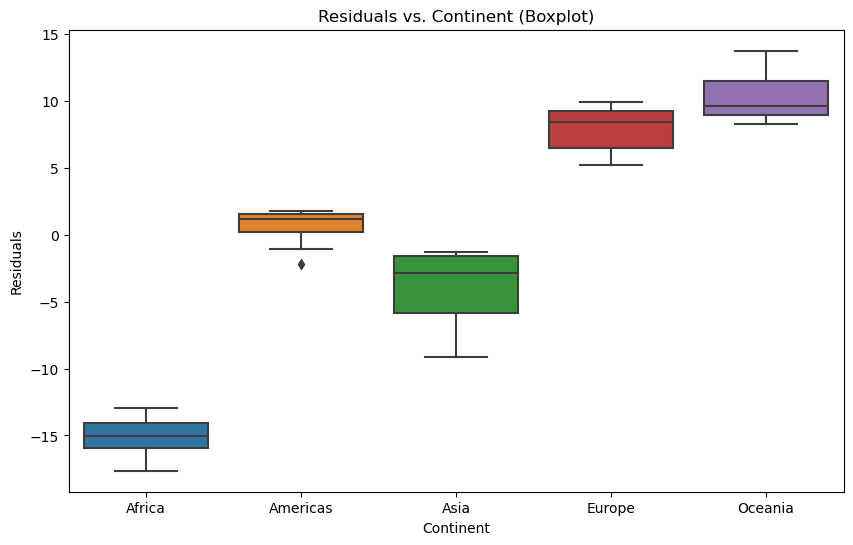

In [8]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='residuals', data=grouped_df)
plt.title('Residuals vs. Continent (Boxplot)')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.show()

**Question 9**:  Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

There is a strong dependence between the model residuals (the differences b/w the observed and predicted values) and 'continent.' This suggests that the linear regression model may not adequately capture the relationship between lifeExp and year for different continents.

**Exercise 5**:  As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

/Users/justinshim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


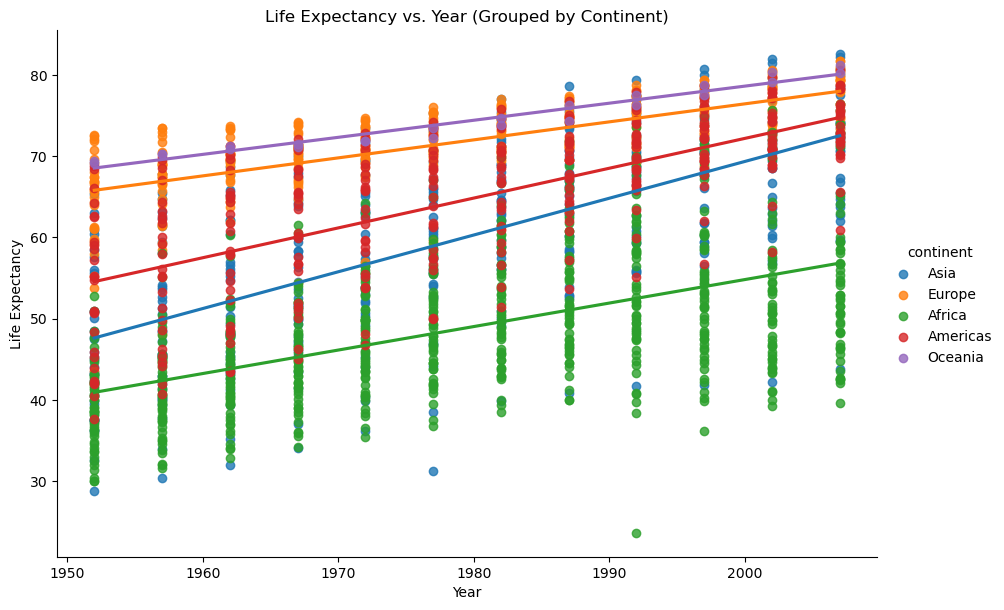

In [9]:
# Create a scatter plot with regression lines
sns.lmplot(x='year', y='lifeExp', data=df, hue='continent', height=6, aspect=1.5, ci=None)
plt.title('Life Expectancy vs. Year (Grouped by Continent)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

**Question 10**:  Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, because each continent experienced a positive correlation between lifeExp and Year. It is possible that continent has a statistically significant effect on the relationship. 

**Exercise 6**:  Fit a linear regression model for life expectancy including a term for an interaction between continent and year. You may import statsmodel.formula.api to run ordinary least squares for this. 

In [10]:
# Fit the linear regression model with interaction term
model = smf.ols(formula="lifeExp ~ year + continent + year:continent", data=df).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary to see the statistics
print(summary)

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:45:57   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           